<a href="https://colab.research.google.com/github/WestHamster/100DAYSOFML/blob/master/Day-17(2)(Heart_disease-2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [0]:
data = pd.read_csv('../input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


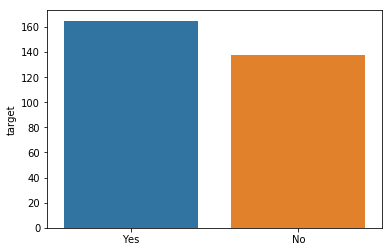

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn
label_target = ['Yes','No']
li_target = data.target.value_counts()

sn.barplot(label_target,li_target)
plt.show()

In [0]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

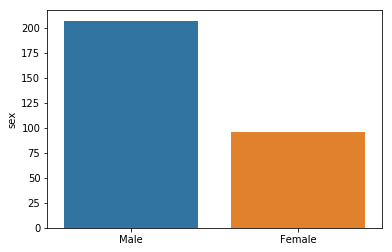

In [0]:
label_s = ['Male','Female']
li_s = data.sex.value_counts()

sn.barplot(label_s,li_s)
plt.show()

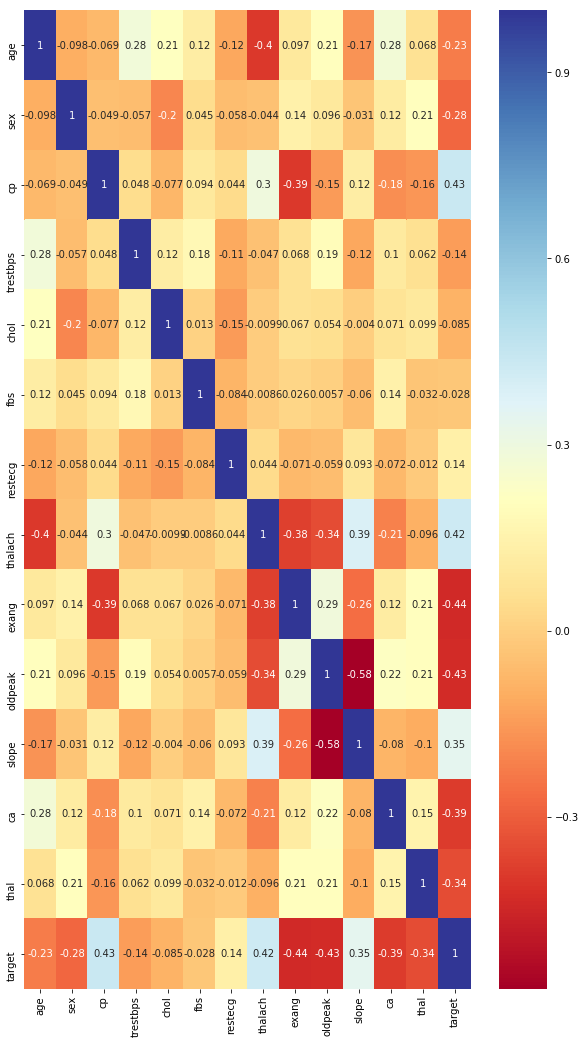

In [0]:
plt.figure(figsize=(10,18))
sn.heatmap(data.corr(),annot=True,cmap='RdYlBu')
plt.show()

In [0]:
features = data.iloc[:,:12]
label = data.iloc[:,-1]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.15,random_state=4)


In [0]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score:',np.mean(y_pred == Y_test)*100)

Accuracy Score: 89.13043478260869


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


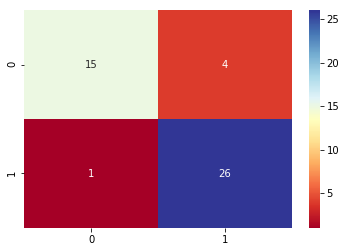

In [0]:
from sklearn.metrics import confusion_matrix
sn.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cmap='RdYlBu')
plt.show()